
Case Analysis | Apprentice Chef <br>
DAT-5303 | Machine Learning <br>
Pattamaphon Sukcharoen<br>
Hult International Business School
<br><br><br>

<strong>In this analysis, I will figure out the significant features to find the business inight from customer behavior. Trying to understand who will decide to subscribe the Highway cross selling. Then I will create the multiple model to find the best model for this project. </strong>

***
***
***

# Import Libraries and definitions
I started the project by importing all necessary library for this project

In [2552]:
import pandas                    as        pd               # data science essentials
import matplotlib.pyplot         as        plt              # essential graphical output
import seaborn                   as        sns              # enhanced graphical output
import statsmodels.formula.api   as        smf 
from   sklearn.model_selection   import    train_test_split # train/test split
from   sklearn.linear_model      import    LinearRegression # linear regression (scikit-learn)
from   sklearn.preprocessing     import    StandardScaler
from   sklearn.metrics           import    confusion_matrix  
from   sklearn.ensemble          import    RandomForestClassifier
from   sklearn.model_selection   import    GridSearchCV 
from   sklearn.ensemble          import    BaggingClassifier
from   sklearn.metrics           import    roc_auc_score            
from   sklearn.neighbors         import    KNeighborsClassifier
from   sklearn.tree              import    DecisionTreeClassifier
from   sklearn.ensemble          import    GradientBoostingClassifier


I created multiple definitions for using in this analysis
* <strong>flag_missing </strong> - to flag the missing value
* <strong>outlier_capmethods</strong> - to visual the outlier and manipulate the data

In [2553]:
#creating the definition to flag the missing value

def flag_missing(chef):
    """
Flags all columns that have missing values with 'NEW_COLUMN_NAME'.

PARAMETERS
----------
chef : the data frame to flag missing value


RETURNS
-------
DataFrame with missing value flags."""
    
    for col in chef:
        if chef[col].isnull().astype(int).sum()>0:
            chef['NEW_'+col] = chef[col].isnull().astype(int)
    return chef

In [2554]:
def outlier_capmethods(chef):
    """
Create the code to visual and detect the outlier by capping the data to new columns   
    
PARAMETERS
----------
chef : the data frame to visual and flag the outlier
    
    """      
    for out in col:
        print(f""" # {out}

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['{out}'])

UP_LIM_{out} = chef['{out}'].quantile(.95)
LO_LIM_{out} = chef['{out}'].quantile(.05)

chef['OUT_{out}'] = 0
chef.loc[(chef['{out}'] > UP_LIM_{out}),'OUT_{out}'] = UP_LIM_{out}
chef.loc[(chef['{out}'] < LO_LIM_{out}),'OUT_{out}'] = LO_LIM_{out} 
chef['OUT_{out}'].replace(to_replace = UP_LIM_{out},value = 1,inplace = True)
chef['OUT_{out}'].replace(to_replace = LO_LIM_{out},value = 1,inplace = True)

print(f"UP_LIM_{out}:95th percentile = UP_LIM_{out} 
LO_LIM_{out}:5th percentile = LO_LIM_{out}")

""") 


In [2555]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1



# Gathering data
Import the original data and try to understand the information from the data by using <strong> .head() </strong> and statistics information by using <strong> describe()</strong>

In [2556]:
# specifying dataset file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

In [2557]:
chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


In [2558]:
chef.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,...,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,...,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,...,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,...,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,...,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,...,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


To ensure that I clearly understand the given information, i decided to import the dictionary of this data to see what each these columns mean

In [2559]:
# specifying description file name
file = 'Course Case -Apprentice_Chef_Data_Dictionary.xlsx'

# reading the file into Python
chef_desc = pd.read_excel(file)

#print out the detail in the file
chef_desc

,Column,Data Type,Description
0,REVENUE,Float,Total revenue generated from the customer
1,CROSS_SELL_SUCCESS,Integer,Success of promoting Halfway There
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name
5,FAMILY_NAME,string,Last name
6,TOTAL_MEALS_ORDERED,Integer,The total amount of meals orderd by the custom...
7,UNIQUE_MEALS_PURCH,Integer,Number of uniqe meal sets ordered by the customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times customer was in contact with c...
9,PRODUCT_CATEGORIES_VIEWED,Integer,Total number of meal categories viewed


# Imputation missing value
I starts explore the data by looking for the missing value, to see if it will effect to the dataset or not. <br><br>
I use <strong> .isnull().sum() </strong> to see the total number of missing value. Fortunately, there are a few missing value which only 47 out of 1946 missing or about 2% of the total row in family columns.

<br>
When the missing column which is <strong>FAMILY_NAME</strong> (object type) and I don't think this missing value is important for this analysis, so I decided to fill 'Unknown' into the missing value.

In [2560]:
#check the missing value 
chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [2633]:
chef['AVG_TIME_PER_SITE_VISIT'].value_counts()

48.00     12
49.00     10
100.00    10
36.00     10
96.00     10
          ..
83.92      1
26.16      1
112.29     1
161.96     1
83.62      1
Name: AVG_TIME_PER_SITE_VISIT, Length: 1454, dtype: int64

In [2561]:
#In FAMILY_NAME columns ,fill the word "Unknown" to the missing value
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna('Unknown')

In [2562]:
#make sure there is no missing value
chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

Then, I created the data col for futher analysis, in case when I call the definition or for loop and need to change the variable from these lists. However, I deleted some columns from the original dataset <strong>(NAME, FIRST_NAME, FAMILY_NAME)</strong> since I decided not to use it for this analysis. <br><br>
Moreover,I removed <strong>EMAIL </strong> in this part but I will consider it for one hot encoder in further analysis.

In [2563]:
col = ('REVENUE',
        'TOTAL_MEALS_ORDERED',
        'UNIQUE_MEALS_PURCH',
        'CONTACTS_W_CUSTOMER_SERVICE',
        'PRODUCT_CATEGORIES_VIEWED',
        'AVG_TIME_PER_SITE_VISIT',
        'MOBILE_NUMBER',
        'CANCELLATIONS_BEFORE_NOON',
        'CANCELLATIONS_AFTER_NOON',
        'TASTES_AND_PREFERENCES',
        'PC_LOGINS',
        'MOBILE_LOGINS',
        'WEEKLY_PLAN',
        'EARLY_DELIVERIES',
        'LATE_DELIVERIES',
        'PACKAGE_LOCKER',
        'REFRIGERATED_LOCKER',
        'FOLLOWED_RECOMMENDATIONS_PCT',
        'AVG_PREP_VID_TIME',
        'LARGEST_ORDER_SIZE',
        'MASTER_CLASSES_ATTENDED',
        'MEDIAN_MEAL_RATING',
        'AVG_CLICKS_PER_VISIT',
        'TOTAL_PHOTOS_VIEWED')

# Feature Engineer
I will feature engineer in 5 techinques
* Handling Outlier - manipulate the outlier by using cap method
* Binning - create the bin to prevent overfitting 
* Log Transform - handle with skew data to become normal distribution
* Trend base - understand the trend of the line
* One hot encoding - Spread the value to new columns and assigns 0 or 1 into the each column


## Handling Outlier
I am handling the outlier by using <strong>cap method</strong> as I dont want to drop the data due to I might need to use it. ,if values are not in the range of 5th and 95th percentile can be outlier. 
<br><br>Moreover, I also plot the graph to compare the original data  if there is the obvious outlier to consider.




In [2564]:
#calling outlier definition,this def only to create the code then copy it and adjust some code for the output
outlier_capmethods(chef)

 # REVENUE

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['REVENUE'])

UP_LIM_REVENUE = chef['REVENUE'].quantile(.95)
LO_LIM_REVENUE = chef['REVENUE'].quantile(.05)

chef['OUT_REVENUE'] = 0
chef.loc[(chef['REVENUE'] > UP_LIM_REVENUE),'OUT_REVENUE'] = UP_LIM_REVENUE
chef.loc[(chef['REVENUE'] < LO_LIM_REVENUE),'OUT_REVENUE'] = LO_LIM_REVENUE 
chef['OUT_REVENUE'].replace(to_replace = UP_LIM_REVENUE,value = 1,inplace = True)
chef['OUT_REVENUE'].replace(to_replace = LO_LIM_REVENUE,value = 1,inplace = True)

print(f"UP_LIM_REVENUE:95th percentile = UP_LIM_REVENUE 
LO_LIM_REVENUE:5th percentile = LO_LIM_REVENUE")


 # TOTAL_MEALS_ORDERED

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['TOTAL_MEALS_ORDERED'])

UP_LIM_TOTAL_MEALS_ORDERED = chef['TOTAL_MEALS_ORDERED'].quantile(.95)
LO_LIM_TOTAL_MEALS_ORDERED = chef['TOTAL_MEALS_ORDERED'].quantile(.05)

chef['OUT_TOTAL_MEALS_ORDERED'] = 0
chef.loc[(chef['TOTAL_MEALS_ORDERED'] > 

After I called the outlier_capmethods, then I copied all code and print out to see graph and quantile output. Then, I starts removing features that don't have outlier. 

The output below I decided to flag the outlier as you can see the boxplot that shows clearly with those outlier.
* Revenue
* Total meals ordered
* Unique meals purch

UP_LIM_REVENUE:95th percentile = 4500.0
LO_LIM_REVENUE:5th percentile = 929.25

UP_LIM_TOTAL_MEALS_ORDERED:95th percentile = 186.75 
LO_LIM_TOTAL_MEALS_ORDERED:5th percentile = 14.0

UP_LIM_UNIQUE_MEALS_PURCH:95th percentile = 9.0 
LO_LIM_UNIQUE_MEALS_PURCH:5th percentile = 1.0



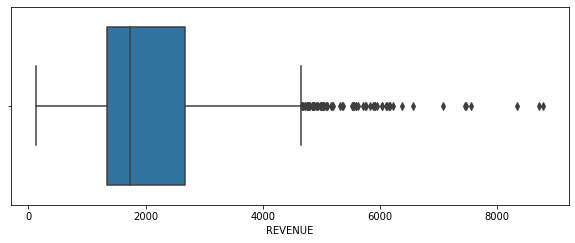

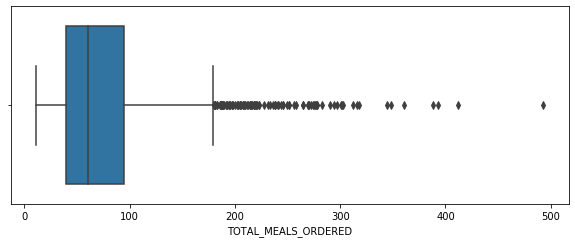

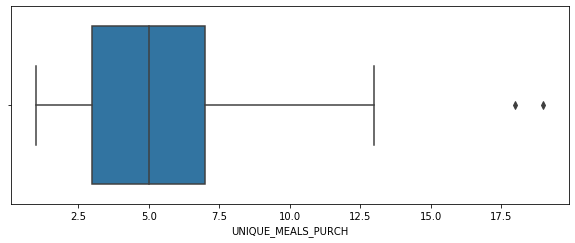

In [2565]:
 # REVENUE
    
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['REVENUE'])

UP_LIM_REVENUE = chef['REVENUE'].quantile(.95)
LO_LIM_REVENUE = chef['REVENUE'].quantile(.05)

chef['OUT_REVENUE'] = 0
chef.loc[(chef['REVENUE'] > UP_LIM_REVENUE),'OUT_REVENUE'] = UP_LIM_REVENUE
chef.loc[(chef['REVENUE'] < LO_LIM_REVENUE),'OUT_REVENUE'] = LO_LIM_REVENUE 
chef['OUT_REVENUE'].replace(to_replace = UP_LIM_REVENUE,value = 1,inplace = True)
chef['OUT_REVENUE'].replace(to_replace = LO_LIM_REVENUE,value = 1,inplace = True)

print(f"""UP_LIM_REVENUE:95th percentile = {UP_LIM_REVENUE}
LO_LIM_REVENUE:5th percentile = {LO_LIM_REVENUE}
""")


 # TOTAL_MEALS_ORDERED 
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['TOTAL_MEALS_ORDERED'])

UP_LIM_TOTAL_MEALS_ORDERED = chef['TOTAL_MEALS_ORDERED'].quantile(.95)
LO_LIM_TOTAL_MEALS_ORDERED = chef['TOTAL_MEALS_ORDERED'].quantile(.05)

chef['OUT_TOTAL_MEALS_ORDERED'] = 0
chef.loc[(chef['TOTAL_MEALS_ORDERED'] > UP_LIM_TOTAL_MEALS_ORDERED),'OUT_TOTAL_MEALS_ORDERED'] = UP_LIM_TOTAL_MEALS_ORDERED
chef.loc[(chef['TOTAL_MEALS_ORDERED'] < LO_LIM_TOTAL_MEALS_ORDERED),'OUT_TOTAL_MEALS_ORDERED'] = LO_LIM_TOTAL_MEALS_ORDERED 
chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = UP_LIM_TOTAL_MEALS_ORDERED,value = 1,inplace = True)
chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = LO_LIM_TOTAL_MEALS_ORDERED,value = 1,inplace = True)

print(f"""UP_LIM_TOTAL_MEALS_ORDERED:95th percentile = {UP_LIM_TOTAL_MEALS_ORDERED} 
LO_LIM_TOTAL_MEALS_ORDERED:5th percentile = {LO_LIM_TOTAL_MEALS_ORDERED}
""")
  
 # UNIQUE_MEALS_PURCH
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['UNIQUE_MEALS_PURCH'])

UP_LIM_UNIQUE_MEALS_PURCH = chef['UNIQUE_MEALS_PURCH'].quantile(.95)
LO_LIM_UNIQUE_MEALS_PURCH = chef['UNIQUE_MEALS_PURCH'].quantile(.05)

chef['OUT_UNIQUE_MEALS_PURCH'] = 0
chef.loc[(chef['UNIQUE_MEALS_PURCH'] > UP_LIM_UNIQUE_MEALS_PURCH),'OUT_UNIQUE_MEALS_PURCH'] = UP_LIM_UNIQUE_MEALS_PURCH
chef.loc[(chef['UNIQUE_MEALS_PURCH'] < LO_LIM_UNIQUE_MEALS_PURCH),'OUT_UNIQUE_MEALS_PURCH'] = LO_LIM_UNIQUE_MEALS_PURCH 
chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = UP_LIM_UNIQUE_MEALS_PURCH,value = 1,inplace = True)
chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = LO_LIM_UNIQUE_MEALS_PURCH,value = 1,inplace = True)

print(f"""UP_LIM_UNIQUE_MEALS_PURCH:95th percentile = {UP_LIM_UNIQUE_MEALS_PURCH} 
LO_LIM_UNIQUE_MEALS_PURCH:5th percentile = {LO_LIM_UNIQUE_MEALS_PURCH}
""")


I am continuing to flag more features in the dataset
* Contacts with customer service
* Average time per site visit
* Cancellation before noon

UP_LIM_CONTACTS_W_CUSTOMER_SERVICE:95th percentile = 11.0 
LO_LIM_CONTACTS_W_CUSTOMER_SERVICE:5th percentile = 4.0

UP_LIM_AVG_TIME_PER_SITE_VISIT:95th percentile = 179.68 
LO_LIM_AVG_TIME_PER_SITE_VISIT:5th percentile = 34.61

UP_LIM_CANCELLATIONS_BEFORE_NOON:95th percentile = 4.0 
LO_LIM_CANCELLATIONS_BEFORE_NOON:5th percentile = 0.0



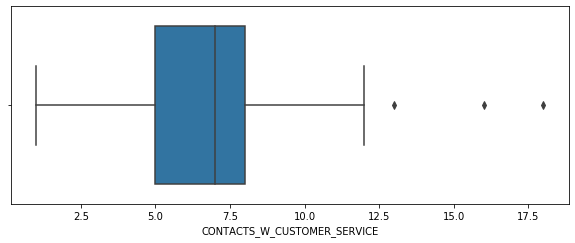

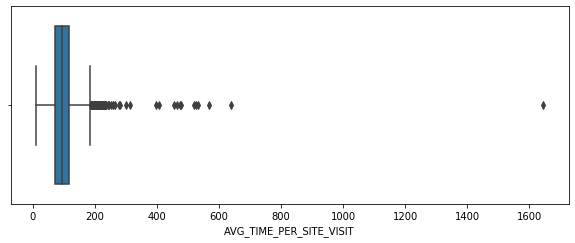

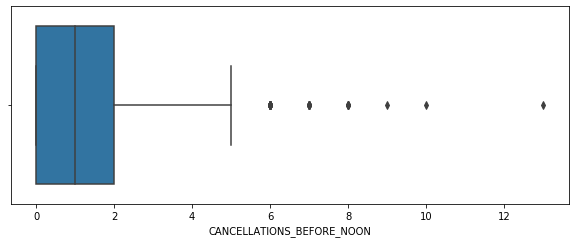

In [2566]:
 # CONTACTS_W_CUSTOMER_SERVICE

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['CONTACTS_W_CUSTOMER_SERVICE'])

UP_LIM_CONTACTS_W_CUSTOMER_SERVICE = chef['CONTACTS_W_CUSTOMER_SERVICE'].quantile(.95)
LO_LIM_CONTACTS_W_CUSTOMER_SERVICE = chef['CONTACTS_W_CUSTOMER_SERVICE'].quantile(.05)

chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
chef.loc[(chef['CONTACTS_W_CUSTOMER_SERVICE'] > UP_LIM_CONTACTS_W_CUSTOMER_SERVICE),'OUT_CONTACTS_W_CUSTOMER_SERVICE'] = UP_LIM_CONTACTS_W_CUSTOMER_SERVICE
chef.loc[(chef['CONTACTS_W_CUSTOMER_SERVICE'] < LO_LIM_CONTACTS_W_CUSTOMER_SERVICE),'OUT_CONTACTS_W_CUSTOMER_SERVICE'] = LO_LIM_CONTACTS_W_CUSTOMER_SERVICE 
chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = UP_LIM_CONTACTS_W_CUSTOMER_SERVICE,value = 1,inplace = True)
chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = LO_LIM_CONTACTS_W_CUSTOMER_SERVICE,value = 1,inplace = True)

print(f"""UP_LIM_CONTACTS_W_CUSTOMER_SERVICE:95th percentile = {UP_LIM_CONTACTS_W_CUSTOMER_SERVICE} 
LO_LIM_CONTACTS_W_CUSTOMER_SERVICE:5th percentile = {LO_LIM_CONTACTS_W_CUSTOMER_SERVICE}
""")
     
 # AVG_TIME_PER_SITE_VISIT

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['AVG_TIME_PER_SITE_VISIT'])

UP_LIM_AVG_TIME_PER_SITE_VISIT = chef['AVG_TIME_PER_SITE_VISIT'].quantile(.95).round(2)
LO_LIM_AVG_TIME_PER_SITE_VISIT = chef['AVG_TIME_PER_SITE_VISIT'].quantile(.05).round(2)

chef['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
chef.loc[(chef['AVG_TIME_PER_SITE_VISIT'] > UP_LIM_AVG_TIME_PER_SITE_VISIT),'OUT_AVG_TIME_PER_SITE_VISIT'] = UP_LIM_AVG_TIME_PER_SITE_VISIT
chef.loc[(chef['AVG_TIME_PER_SITE_VISIT'] < LO_LIM_AVG_TIME_PER_SITE_VISIT),'OUT_AVG_TIME_PER_SITE_VISIT'] = LO_LIM_AVG_TIME_PER_SITE_VISIT 
chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = UP_LIM_AVG_TIME_PER_SITE_VISIT,value = 1,inplace = True)
chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = LO_LIM_AVG_TIME_PER_SITE_VISIT,value = 1,inplace = True)

print(f"""UP_LIM_AVG_TIME_PER_SITE_VISIT:95th percentile = {UP_LIM_AVG_TIME_PER_SITE_VISIT} 
LO_LIM_AVG_TIME_PER_SITE_VISIT:5th percentile = {LO_LIM_AVG_TIME_PER_SITE_VISIT}
""")

# CANCELLATIONS_BEFORE_NOON

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['CANCELLATIONS_BEFORE_NOON'])

UP_LIM_CANCELLATIONS_BEFORE_NOON = chef['CANCELLATIONS_BEFORE_NOON'].quantile(.95)
LO_LIM_CANCELLATIONS_BEFORE_NOON = chef['CANCELLATIONS_BEFORE_NOON'].quantile(.05)

chef['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
chef.loc[(chef['CANCELLATIONS_BEFORE_NOON'] > UP_LIM_CANCELLATIONS_BEFORE_NOON),'OUT_CANCELLATIONS_BEFORE_NOON'] = UP_LIM_CANCELLATIONS_BEFORE_NOON
chef.loc[(chef['CANCELLATIONS_BEFORE_NOON'] < LO_LIM_CANCELLATIONS_BEFORE_NOON),'OUT_CANCELLATIONS_BEFORE_NOON'] = LO_LIM_CANCELLATIONS_BEFORE_NOON 
chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = UP_LIM_CANCELLATIONS_BEFORE_NOON,value = 1,inplace = True)
chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = LO_LIM_CANCELLATIONS_BEFORE_NOON,value = 1,inplace = True)

print(f"""UP_LIM_CANCELLATIONS_BEFORE_NOON:95th percentile = {UP_LIM_CANCELLATIONS_BEFORE_NOON} 
LO_LIM_CANCELLATIONS_BEFORE_NOON:5th percentile = {LO_LIM_CANCELLATIONS_BEFORE_NOON}
""")    


More features
* Weekly Plan
* Early deliveries
* Late delriveries

UP_LIM_WEEKLY_PLAN:95th percentile = 45.0 
LO_LIM_WEEKLY_PLAN:5th percentile = 0.0

UP_LIM_EARLY_DELIVERIES:95th percentile = 7.0 
LO_LIM_EARLY_DELIVERIES:5th percentile = 0.0

UP_LIM_LATE_DELIVERIES:95th percentile = 8.0 
LO_LIM_LATE_DELIVERIES:5th percentile = 0.0



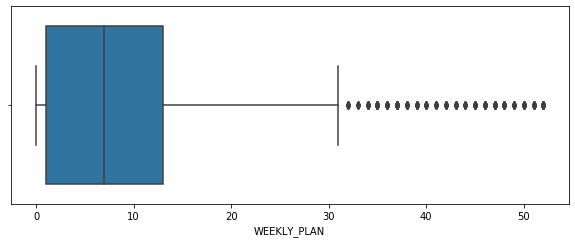

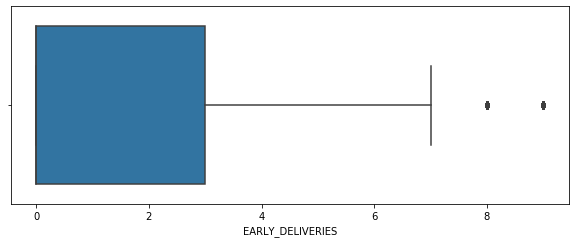

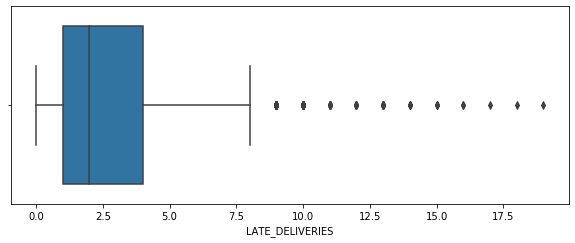

In [2567]:
 # WEEKLY_PLAN

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['WEEKLY_PLAN'])

UP_LIM_WEEKLY_PLAN = chef['WEEKLY_PLAN'].quantile(.95)
LO_LIM_WEEKLY_PLAN = chef['WEEKLY_PLAN'].quantile(.05)
chef['OUT_WEEKLY_PLAN'] = 0
chef.loc[(chef['WEEKLY_PLAN'] > UP_LIM_WEEKLY_PLAN),'OUT_WEEKLY_PLAN'] = UP_LIM_WEEKLY_PLAN
chef.loc[(chef['WEEKLY_PLAN'] < LO_LIM_WEEKLY_PLAN),'OUT_WEEKLY_PLAN'] = LO_LIM_WEEKLY_PLAN 
chef['OUT_WEEKLY_PLAN'].replace(to_replace = UP_LIM_WEEKLY_PLAN,value = 1,inplace = True)
chef['OUT_WEEKLY_PLAN'].replace(to_replace = LO_LIM_WEEKLY_PLAN,value = 1,inplace = True)
print(f"""UP_LIM_WEEKLY_PLAN:95th percentile = {UP_LIM_WEEKLY_PLAN} 
LO_LIM_WEEKLY_PLAN:5th percentile = {LO_LIM_WEEKLY_PLAN}
""")


# EARLY_DELIVERIES

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['EARLY_DELIVERIES'])

UP_LIM_EARLY_DELIVERIES = chef['EARLY_DELIVERIES'].quantile(.95)
LO_LIM_EARLY_DELIVERIES = chef['EARLY_DELIVERIES'].quantile(.05)
chef['OUT_EARLY_DELIVERIES'] = 0
chef.loc[(chef['EARLY_DELIVERIES'] > UP_LIM_EARLY_DELIVERIES),'OUT_EARLY_DELIVERIES'] = UP_LIM_EARLY_DELIVERIES
chef.loc[(chef['EARLY_DELIVERIES'] < LO_LIM_EARLY_DELIVERIES),'OUT_EARLY_DELIVERIES'] = LO_LIM_EARLY_DELIVERIES 
chef['OUT_EARLY_DELIVERIES'].replace(to_replace = UP_LIM_EARLY_DELIVERIES,value = 1,inplace = True)
chef['OUT_EARLY_DELIVERIES'].replace(to_replace = LO_LIM_EARLY_DELIVERIES,value = 1,inplace = True)
print(f"""UP_LIM_EARLY_DELIVERIES:95th percentile = {UP_LIM_EARLY_DELIVERIES} 
LO_LIM_EARLY_DELIVERIES:5th percentile = {LO_LIM_EARLY_DELIVERIES}
""")

 # LATE_DELIVERIES

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['LATE_DELIVERIES'])

UP_LIM_LATE_DELIVERIES = chef['LATE_DELIVERIES'].quantile(.95)
LO_LIM_LATE_DELIVERIES = chef['LATE_DELIVERIES'].quantile(.05)
chef['OUT_LATE_DELIVERIES'] = 0
chef.loc[(chef['LATE_DELIVERIES'] > UP_LIM_LATE_DELIVERIES),'OUT_LATE_DELIVERIES'] = UP_LIM_LATE_DELIVERIES
chef.loc[(chef['LATE_DELIVERIES'] < LO_LIM_LATE_DELIVERIES),'OUT_LATE_DELIVERIES'] = LO_LIM_LATE_DELIVERIES 
chef['OUT_LATE_DELIVERIES'].replace(to_replace = UP_LIM_LATE_DELIVERIES,value = 1,inplace = True)
chef['OUT_LATE_DELIVERIES'].replace(to_replace = LO_LIM_LATE_DELIVERIES,value = 1,inplace = True)
print(f"""UP_LIM_LATE_DELIVERIES:95th percentile = {UP_LIM_LATE_DELIVERIES} 
LO_LIM_LATE_DELIVERIES:5th percentile = {LO_LIM_LATE_DELIVERIES}
""")

 

* Average prep video time
* Largest order size
* Master classes attend

UP_LIM_AVG_PREP_VID_TIME:95th percentile = 244.77500000000003 
LO_LIM_AVG_PREP_VID_TIME:5th percentile = 85.85

UP_LIM_LARGEST_ORDER_SIZE:95th percentile = 7.0 
LO_LIM_LARGEST_ORDER_SIZE:5th percentile = 2.0

UP_LIM_MASTER_CLASSES_ATTENDED:95th percentile = 2.0 
LO_LIM_MASTER_CLASSES_ATTENDED:5th percentile = 0.0



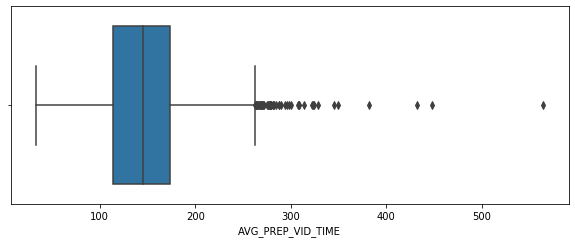

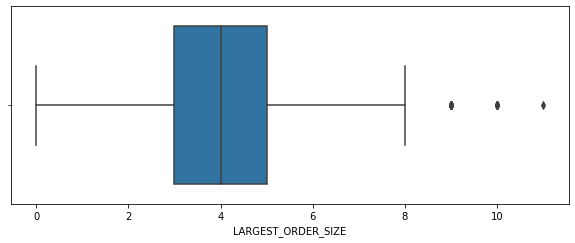

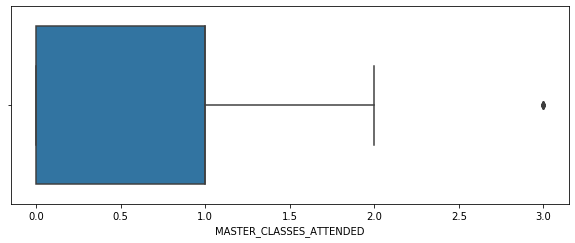

In [2568]:
#AVG_PREP_VID_TIME
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['AVG_PREP_VID_TIME'])

UP_LIM_AVG_PREP_VID_TIME = chef['AVG_PREP_VID_TIME'].quantile(.95)
LO_LIM_AVG_PREP_VID_TIME = chef['AVG_PREP_VID_TIME'].quantile(.05)
chef['OUT_AVG_PREP_VID_TIME'] = 0
chef.loc[(chef['AVG_PREP_VID_TIME'] > UP_LIM_AVG_PREP_VID_TIME),'OUT_AVG_PREP_VID_TIME'] = UP_LIM_AVG_PREP_VID_TIME
chef.loc[(chef['AVG_PREP_VID_TIME'] < LO_LIM_AVG_PREP_VID_TIME),'OUT_AVG_PREP_VID_TIME'] = LO_LIM_AVG_PREP_VID_TIME 
chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = UP_LIM_AVG_PREP_VID_TIME,value = 1,inplace = True)
chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = LO_LIM_AVG_PREP_VID_TIME,value = 1,inplace = True)
print(f"""UP_LIM_AVG_PREP_VID_TIME:95th percentile = {UP_LIM_AVG_PREP_VID_TIME} 
LO_LIM_AVG_PREP_VID_TIME:5th percentile = {LO_LIM_AVG_PREP_VID_TIME}
""")


# LARGEST_ORDER_SIZE
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['LARGEST_ORDER_SIZE'])

UP_LIM_LARGEST_ORDER_SIZE = chef['LARGEST_ORDER_SIZE'].quantile(.95)
LO_LIM_LARGEST_ORDER_SIZE = chef['LARGEST_ORDER_SIZE'].quantile(.05)
chef['OUT_LARGEST_ORDER_SIZE'] = 0
chef.loc[(chef['LARGEST_ORDER_SIZE'] > UP_LIM_LARGEST_ORDER_SIZE),'OUT_LARGEST_ORDER_SIZE'] = UP_LIM_LARGEST_ORDER_SIZE
chef.loc[(chef['LARGEST_ORDER_SIZE'] < LO_LIM_LARGEST_ORDER_SIZE),'OUT_LARGEST_ORDER_SIZE'] = LO_LIM_LARGEST_ORDER_SIZE 
chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = UP_LIM_LARGEST_ORDER_SIZE,value = 1,inplace = True)
chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = LO_LIM_LARGEST_ORDER_SIZE,value = 1,inplace = True)
print(f"""UP_LIM_LARGEST_ORDER_SIZE:95th percentile = {UP_LIM_LARGEST_ORDER_SIZE} 
LO_LIM_LARGEST_ORDER_SIZE:5th percentile = {LO_LIM_LARGEST_ORDER_SIZE}
""")


 # MASTER_CLASSES_ATTENDED
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['MASTER_CLASSES_ATTENDED'])

UP_LIM_MASTER_CLASSES_ATTENDED = chef['MASTER_CLASSES_ATTENDED'].quantile(.95)
LO_LIM_MASTER_CLASSES_ATTENDED = chef['MASTER_CLASSES_ATTENDED'].quantile(.05)
chef['OUT_MASTER_CLASSES_ATTENDED'] = 0
chef.loc[(chef['MASTER_CLASSES_ATTENDED'] > UP_LIM_MASTER_CLASSES_ATTENDED),'OUT_MASTER_CLASSES_ATTENDED'] = UP_LIM_MASTER_CLASSES_ATTENDED
chef.loc[(chef['MASTER_CLASSES_ATTENDED'] < LO_LIM_MASTER_CLASSES_ATTENDED),'OUT_MASTER_CLASSES_ATTENDED'] = LO_LIM_MASTER_CLASSES_ATTENDED 
chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = UP_LIM_MASTER_CLASSES_ATTENDED,value = 1,inplace = True)
chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = LO_LIM_MASTER_CLASSES_ATTENDED,value = 1,inplace = True)
print(f"""UP_LIM_MASTER_CLASSES_ATTENDED:95th percentile = {UP_LIM_MASTER_CLASSES_ATTENDED} 
LO_LIM_MASTER_CLASSES_ATTENDED:5th percentile = {LO_LIM_MASTER_CLASSES_ATTENDED}
""")


* Median meal rating
* average clickes per visit
* Total photos viewed

UP_LIM_MEDIAN_MEAL_RATING:95th percentile = 4.0 
LO_LIM_MEDIAN_MEAL_RATING:5th percentile = 1.0

UP_LIM_AVG_CLICKS_PER_VISIT:95th percentile = 17.0 
LO_LIM_AVG_CLICKS_PER_VISIT:5th percentile = 10.0

UP_LIM_TOTAL_PHOTOS_VIEWED:95th percentile = 471.5 
LO_LIM_TOTAL_PHOTOS_VIEWED:5th percentile = 0.0


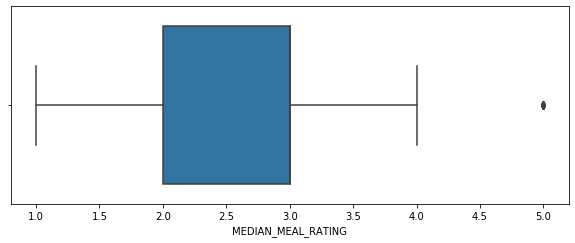

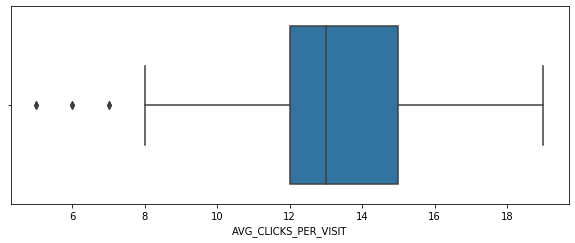

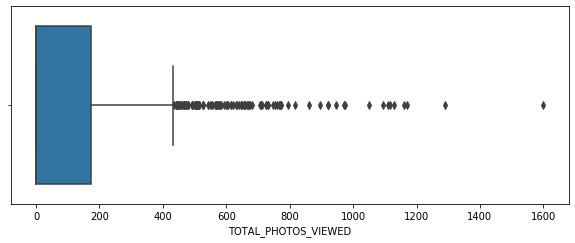

In [2569]:
# MEDIAN_MEAL_RATING
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['MEDIAN_MEAL_RATING'])

UP_LIM_MEDIAN_MEAL_RATING = chef['MEDIAN_MEAL_RATING'].quantile(.95)
LO_LIM_MEDIAN_MEAL_RATING = chef['MEDIAN_MEAL_RATING'].quantile(.05)
chef['OUT_MEDIAN_MEAL_RATING'] = 0
chef.loc[(chef['MEDIAN_MEAL_RATING'] > UP_LIM_MEDIAN_MEAL_RATING),'OUT_MEDIAN_MEAL_RATING'] = UP_LIM_MEDIAN_MEAL_RATING
chef.loc[(chef['MEDIAN_MEAL_RATING'] < LO_LIM_MEDIAN_MEAL_RATING),'OUT_MEDIAN_MEAL_RATING'] = LO_LIM_MEDIAN_MEAL_RATING 
chef['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = UP_LIM_MEDIAN_MEAL_RATING,value = 1,inplace    = True)
chef['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = LO_LIM_MEDIAN_MEAL_RATING,value = 1,inplace    = True)
print(f"""UP_LIM_MEDIAN_MEAL_RATING:95th percentile = {UP_LIM_MEDIAN_MEAL_RATING} 
LO_LIM_MEDIAN_MEAL_RATING:5th percentile = {LO_LIM_MEDIAN_MEAL_RATING}
""")

 # AVG_CLICKS_PER_VISIT
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['AVG_CLICKS_PER_VISIT'])

UP_LIM_AVG_CLICKS_PER_VISIT = chef['AVG_CLICKS_PER_VISIT'].quantile(.95)
LO_LIM_AVG_CLICKS_PER_VISIT = chef['AVG_CLICKS_PER_VISIT'].quantile(.05)
chef['OUT_AVG_CLICKS_PER_VISIT'] = 0
chef.loc[(chef['AVG_CLICKS_PER_VISIT'] > UP_LIM_AVG_CLICKS_PER_VISIT),'OUT_AVG_CLICKS_PER_VISIT'] = UP_LIM_AVG_CLICKS_PER_VISIT
chef.loc[(chef['AVG_CLICKS_PER_VISIT'] < LO_LIM_AVG_CLICKS_PER_VISIT),'OUT_AVG_CLICKS_PER_VISIT'] = LO_LIM_AVG_CLICKS_PER_VISIT 
chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = UP_LIM_AVG_CLICKS_PER_VISIT,value = 1,inplace = True)
chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = LO_LIM_AVG_CLICKS_PER_VISIT,value = 1,inplace = True)
print(f"""UP_LIM_AVG_CLICKS_PER_VISIT:95th percentile = {UP_LIM_AVG_CLICKS_PER_VISIT} 
LO_LIM_AVG_CLICKS_PER_VISIT:5th percentile = {LO_LIM_AVG_CLICKS_PER_VISIT}
""")

 # TOTAL_PHOTOS_VIEWED
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.boxplot(chef['TOTAL_PHOTOS_VIEWED'])

UP_LIM_TOTAL_PHOTOS_VIEWED = chef['TOTAL_PHOTOS_VIEWED'].quantile(.95)
LO_LIM_TOTAL_PHOTOS_VIEWED = chef['TOTAL_PHOTOS_VIEWED'].quantile(.05)
chef['OUT_TOTAL_PHOTOS_VIEWED'] = 0
chef.loc[(chef['TOTAL_PHOTOS_VIEWED'] > UP_LIM_TOTAL_PHOTOS_VIEWED),'OUT_TOTAL_PHOTOS_VIEWED'] = UP_LIM_TOTAL_PHOTOS_VIEWED
chef.loc[(chef['TOTAL_PHOTOS_VIEWED'] < UP_LIM_TOTAL_PHOTOS_VIEWED),'OUT_TOTAL_PHOTOS_VIEWED'] = UP_LIM_TOTAL_PHOTOS_VIEWED 
chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = UP_LIM_TOTAL_PHOTOS_VIEWED, value = 1,inplace = True)
chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = LO_LIM_TOTAL_PHOTOS_VIEWED, value = 1,inplace = True)
print(f"""UP_LIM_TOTAL_PHOTOS_VIEWED:95th percentile = {UP_LIM_TOTAL_PHOTOS_VIEWED} 
LO_LIM_TOTAL_PHOTOS_VIEWED:5th percentile = {LO_LIM_TOTAL_PHOTOS_VIEWED}""")


## Log Transform
I decied to use Log transform as it might help me dealing with the skewed data that can data become closely to the normal distribution. So that, it will make data more interpretable to for the statistics.


In [2570]:
#Creating for loop to change the feature name , then I copied all then remove feature that does not have skewed data
#The code below will create the distplot after they transform to log into the new columns


# for log in col:
#     print(f""" #{log}
# chef['log_{log}'] = (chef['{log}']+1).transform(np.log).round(3)
# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 1, 1)
# sns.distplot(chef['log_{log}'])

# """)

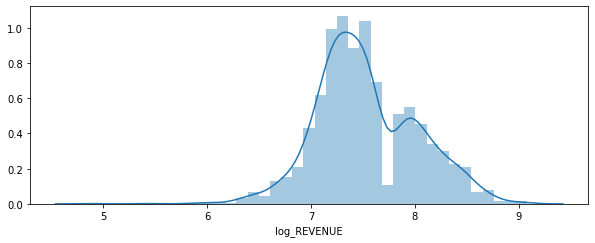

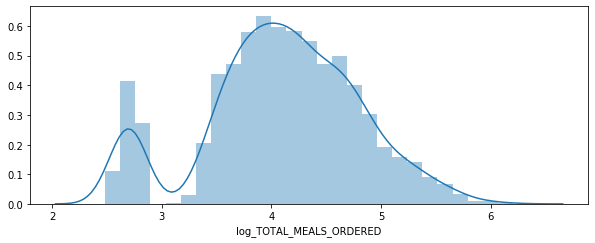

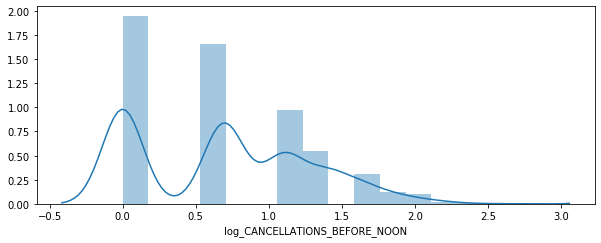

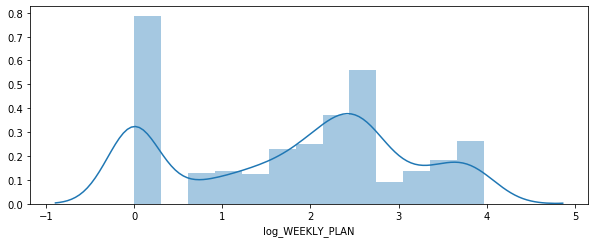

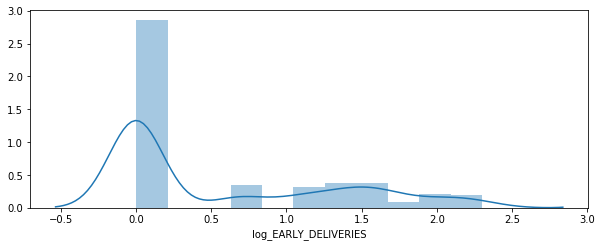

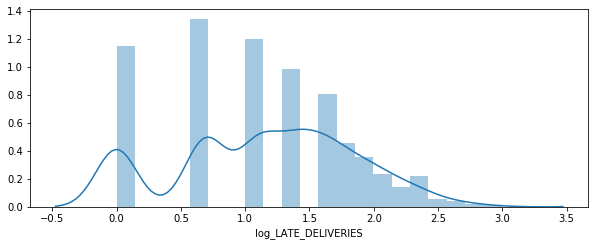

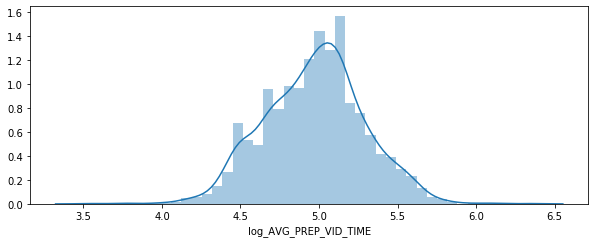

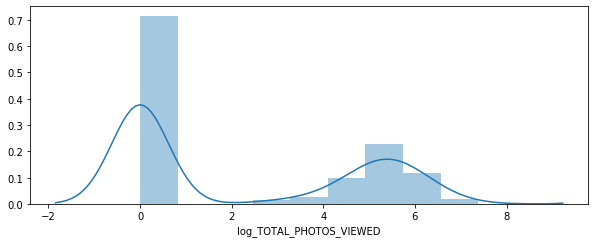

In [2571]:
 #REVENUE
chef['log_REVENUE'] = (chef['REVENUE']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_REVENUE'])

 #TOTAL_MEALS_ORDERED
chef['log_TOTAL_MEALS_ORDERED'] = (chef['TOTAL_MEALS_ORDERED']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_TOTAL_MEALS_ORDERED'])

 #CANCELLATIONS_BEFORE_NOON
chef['log_CANCELLATIONS_BEFORE_NOON'] = (chef['CANCELLATIONS_BEFORE_NOON']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_CANCELLATIONS_BEFORE_NOON'])

 #WEEKLY_PLAN
chef['log_WEEKLY_PLAN'] = (chef['WEEKLY_PLAN']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_WEEKLY_PLAN'])

 #EARLY_DELIVERIES
chef['log_EARLY_DELIVERIES'] = (chef['EARLY_DELIVERIES']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_EARLY_DELIVERIES'])
 
#LATE_DELIVERIES
chef['log_LATE_DELIVERIES'] = (chef['LATE_DELIVERIES']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_LATE_DELIVERIES'])

 #AVG_PREP_VID_TIME
chef['log_AVG_PREP_VID_TIME'] = (chef['AVG_PREP_VID_TIME']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_AVG_PREP_VID_TIME'])

 #TOTAL_PH'OTOS_VIEWED
chef['log_TOTAL_PHOTOS_VIEWED'] = (chef['TOTAL_PHOTOS_VIEWED']+1).transform(np.log).round(3)
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.distplot(chef['log_TOTAL_PHOTOS_VIEWED'])

## Binning
The technique will help me classify the valuefrom  the continue numeric also create the range of the value.

In [2572]:
# I create another for loop to easily change the variable name

#     for bin in col_update:
#         print(f"""print(chef['{bin}'].value_counts())""")

# binning(chef)
        

In [2573]:
#creatig the lable which will be flexible to change the value or the name of each labels
labels_5 = [1,2,3,4,5]  #high range of the value so I seperate to 5 bins
labels_3 = [1,2,3]      #low range of the value , only 3 bins
labels_3_text = [30,60,90] 

#REVENUE
chef['BIN_REVENUE'] = pd.cut(np.array(chef['REVENUE']),
                                             bins=5, 
                                             labels= labels_5) 
#TOTAL MEALS ORDERED
chef['BIN_TOTAL_MEALS_ORDERED'] = pd.cut(chef['TOTAL_MEALS_ORDERED'],
                                             bins=5, 
                                             labels= labels_5)
#UNIQUE_MEALS_PURCH
chef['BIN_UNIQUE_MEALS_PURCH'] = pd.cut(np.array(chef['UNIQUE_MEALS_PURCH']),
                                            bins=3, 
                                            labels= labels_3)
#CONTACTS_W_CUSTOMER_SERVICE 
chef['BIN_CONTACTS_W_CUSTOMER_SERVICE'] = pd.cut(chef['AVG_TIME_PER_SITE_VISIT'],
                                            bins=3, 
                                            labels=labels_3)
#PRODUCT_CATEGORIES_VIEWED 
chef['BIN_PRODUCT_CATEGORIES_VIEWED'] = pd.cut(chef['AVG_TIME_PER_SITE_VISIT'], 
                                            bins=3, 
                                            labels=labels_3)
#AVG_TIME_PER_SITE_VISIT
chef['BIN_AVG_TIME_PER_SITE_VISIT'] = pd.cut(np.array(chef['AVG_TIME_PER_SITE_VISIT']),
                                            bins=3,
                                            labels=labels_3)
# WEEKLY_PLAN
chef['BIN_WEEKLY_PLAN'] = pd.cut(chef['WEEKLY_PLAN'],
                                             bins=3,
                                             labels=labels_3)
#EARLY_DELIVERIES
chef['BIN_EARLY_DELIVERIES'] = pd.cut(chef['EARLY_DELIVERIES'],
                                              bins=3,
                                              labels=labels_3)
#LATE_DELIVERIES
chef['BIN_LATE_DELIVERIES'] = pd.cut(chef['LATE_DELIVERIES'],
                                              bins=3,
                                              labels=labels_3)
#FOLLOWED_RECOMMENDATIONS
chef['BIN_FOLLOWED_RECOMMENDATIONS_PCT'] = pd.cut(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                                              bins=3,
                                              labels=labels_3)
#AVG_PREP_VID_TIME
chef['BIN_AVG_PREP_VID_TIME'] = pd.cut(chef['AVG_PREP_VID_TIME'],
                                              bins = 3,
                                              labels=labels_3)
#LARGEST_ORDER_SIZE
chef['BIN_LARGEST_ORDER_SIZE'] = pd.cut(chef['LARGEST_ORDER_SIZE'],
                                              bins=3,
                                              labels=labels_3)
#AVG_CLICKS_PER_VISIT
chef['BIN_AVG_CLICKS_PER_VISIT'] = pd.cut(chef['AVG_CLICKS_PER_VISIT'],
                                              bins=3,
                                              labels=labels_3)
#TOTAL_PHOTOS_VIEWED
chef['BIN_TOTAL_PHOTOS_VIEWED'] = pd.cut(chef['TOTAL_PHOTOS_VIEWED'],
                                              bins = 5,
                                              labels=labels_5)

## Trend base
After I created the bin with some features, then I decided to the trend of each variables. By doing that, I crete the plot to and adding mean value in the graph so I will see the point that trend has changed.

As our target variable is a clissification data, so use boxplot to visual all trend base in every variables.

In [2574]:
#creating for loop to better change the variable name

# for trend in col:
#     print(f""" # {trend}
# fig, ax = plt.subplots(figsize = (6, 12))
# plt.subplot(2, 1, 1)
# sns.boxplot(x =chef['{trend}'],
#                 y = chef['CROSS_SELL_SUCCESS'],
#                 color = 'g',showmeans = True)
# plt.xlabel('{trend}')

# """)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

Text(0.5, 0, 'TOTAL_PHOTOS_VIEWED')

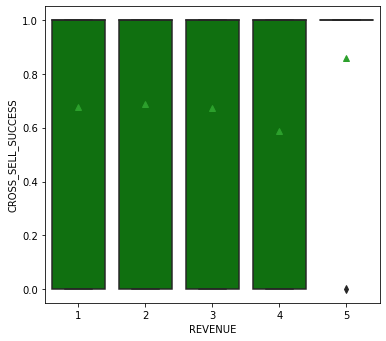

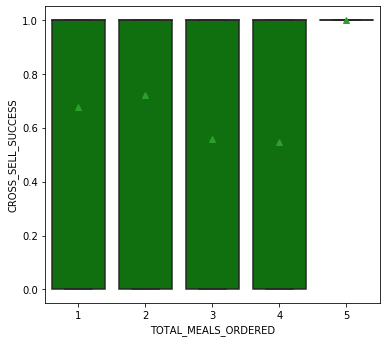

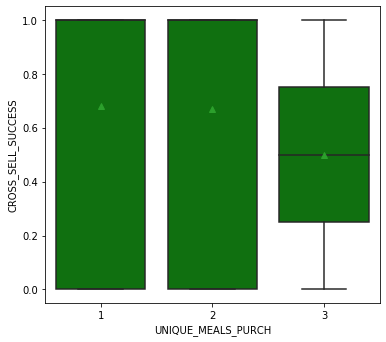

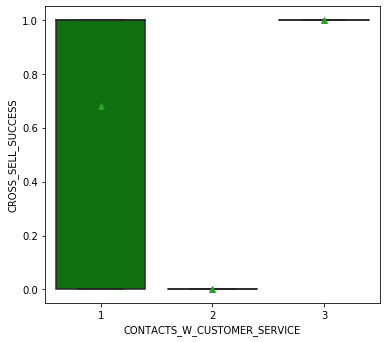

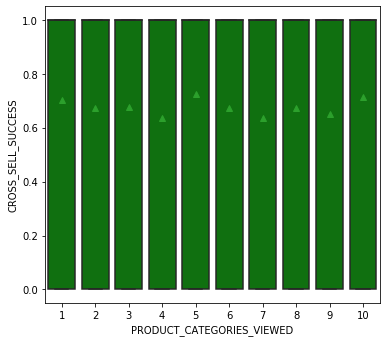

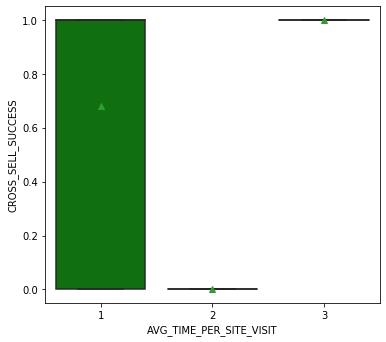

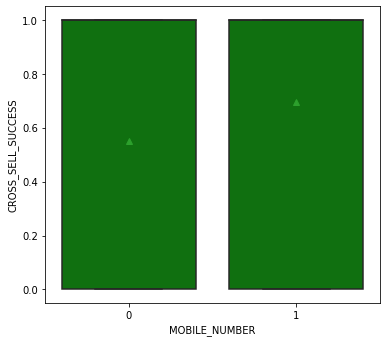

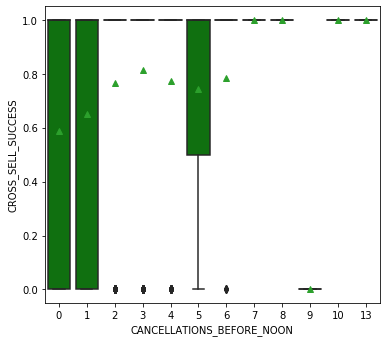

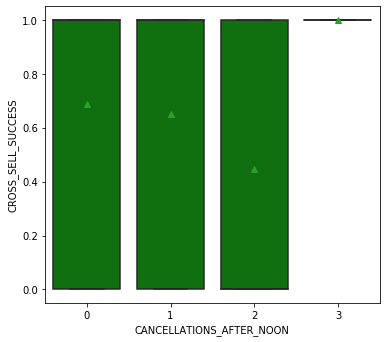

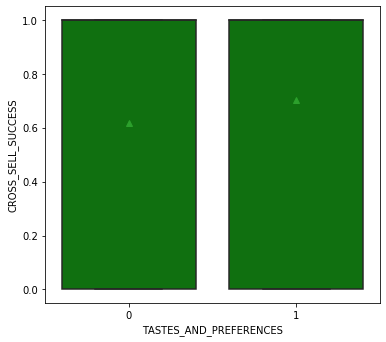

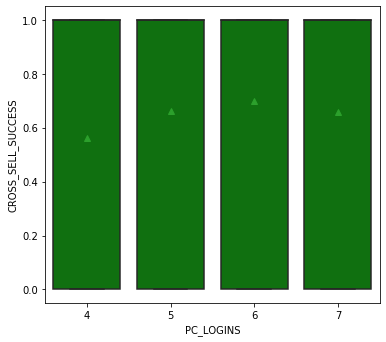

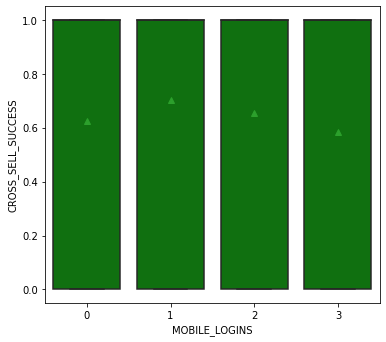

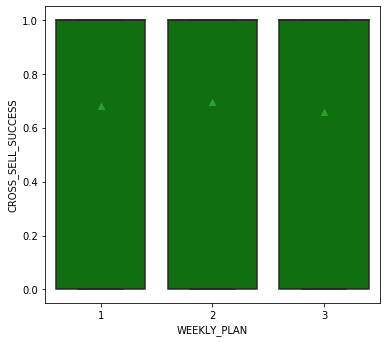

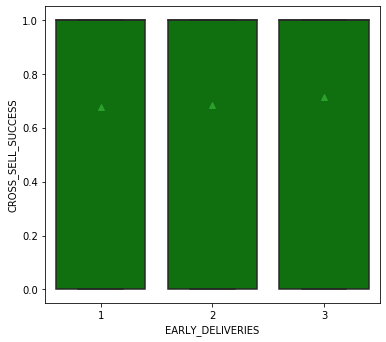

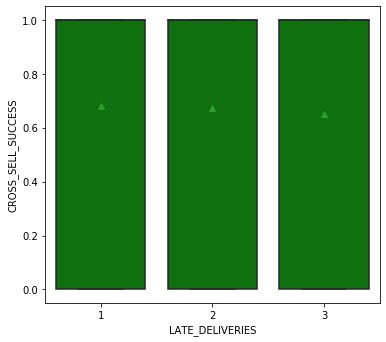

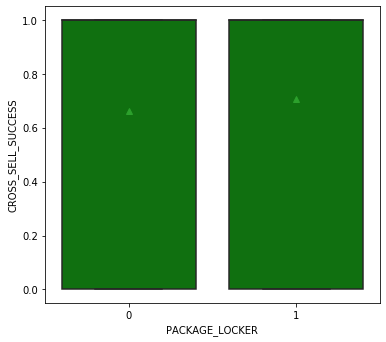

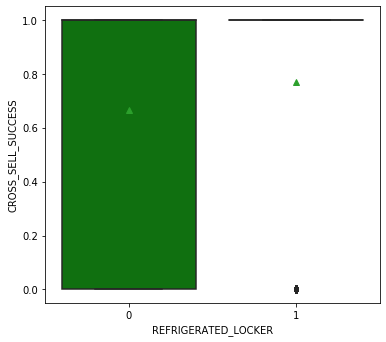

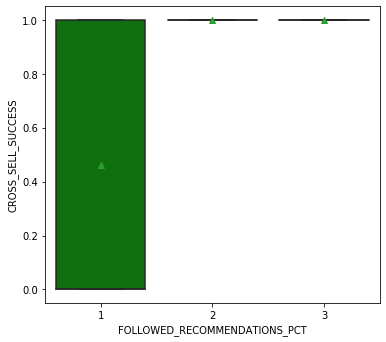

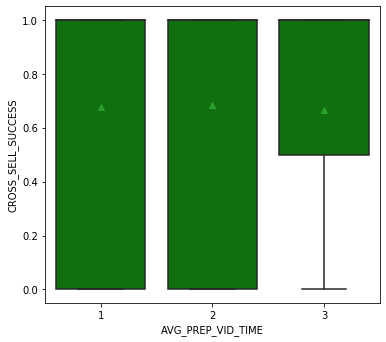

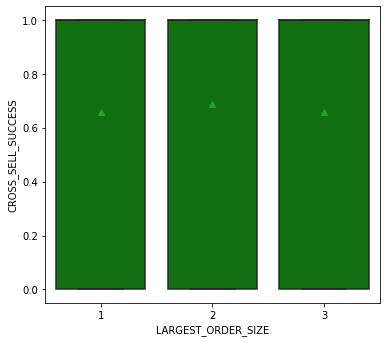

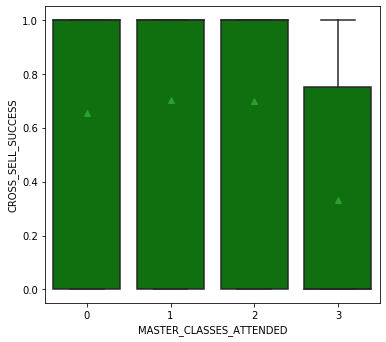

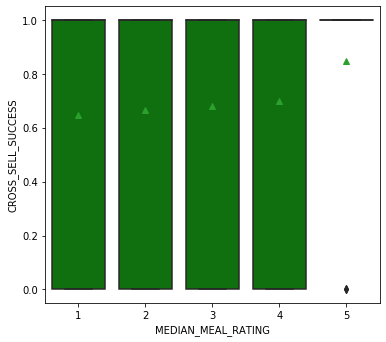

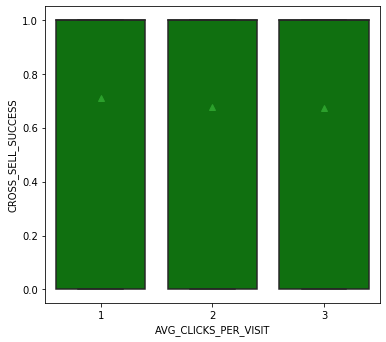

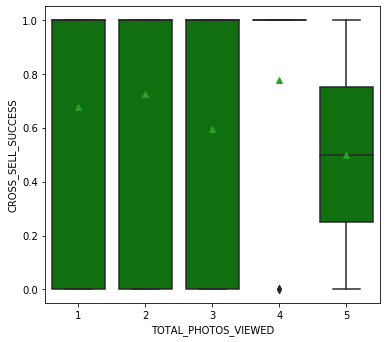

In [2575]:
 # REVENUE
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_REVENUE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('REVENUE')

 # TOTAL_MEALS_ORDERED
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_TOTAL_MEALS_ORDERED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('TOTAL_MEALS_ORDERED')

 # UNIQUE_MEALS_PURCH
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_UNIQUE_MEALS_PURCH'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('UNIQUE_MEALS_PURCH')

 # CONTACTS_W_CUSTOMER_SERVICE
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

 # PRODUCT_CATEGORIES_VIEWED
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

 # AVG_TIME_PER_SITE_VISIT
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_AVG_TIME_PER_SITE_VISIT'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

 # MOBILE_NUMBER
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['MOBILE_NUMBER'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('MOBILE_NUMBER')

 # CANCELLATIONS_BEFORE_NOON
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

 # CANCELLATIONS_AFTER_NOON
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('CANCELLATIONS_AFTER_NOON')

 # TASTES_AND_PREFERENCES
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['TASTES_AND_PREFERENCES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('TASTES_AND_PREFERENCES')

 # PC_LOGINS
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['PC_LOGINS'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('PC_LOGINS')

 # MOBILE_LOGINS
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['MOBILE_LOGINS'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('MOBILE_LOGINS')

 # WEEKLY_PLAN
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_WEEKLY_PLAN'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('WEEKLY_PLAN')

 # EARLY_DELIVERIES
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_EARLY_DELIVERIES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('EARLY_DELIVERIES')

 # LATE_DELIVERIES
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_LATE_DELIVERIES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('LATE_DELIVERIES')

 # PACKAGE_LOCKER
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['PACKAGE_LOCKER'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('PACKAGE_LOCKER')

 # REFRIGERATED_LOCKER
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['REFRIGERATED_LOCKER'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('REFRIGERATED_LOCKER')

 # FOLLOWED_RECOMMENDATIONS_PCT
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

 # AVG_PREP_VID_TIME
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_AVG_PREP_VID_TIME'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('AVG_PREP_VID_TIME')

 # LARGEST_ORDER_SIZE
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_LARGEST_ORDER_SIZE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('LARGEST_ORDER_SIZE')

 # MASTER_CLASSES_ATTENDED
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['MASTER_CLASSES_ATTENDED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('MASTER_CLASSES_ATTENDED')

 # MEDIAN_MEAL_RATING
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['MEDIAN_MEAL_RATING'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('MEDIAN_MEAL_RATING')

 # AVG_CLICKS_PER_VISIT
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_AVG_CLICKS_PER_VISIT'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('AVG_CLICKS_PER_VISIT')

 # TOTAL_PHOTOS_VIEWED
fig, ax = plt.subplots(figsize = (6, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x =chef['BIN_TOTAL_PHOTOS_VIEWED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g',showmeans = True)
plt.xlabel('TOTAL_PHOTOS_VIEWED')


After I created the boxplot with the average point, I clearly see the trend point, so I flag those value to create new columns for further analysis.

In [2576]:
## Feature Engineering (trend changes)                                  
# developing features (columns) for outliers
change_bin_revenue_after = 4
change_bin_total_meals_ordered_after = 4
change_bin_unique_meals_purch_after = 2
change_bin_contacts_w_customer_service_after = 1
change_bin_avg_time_per_site_visit_after = 1
change_cancellations_before_noon_after = 2
change_mobile_logins_after = 1
change_bin_followed_recommendations_pct_after =2 
change_bin_master_class_attended_after=2
change_bin_total_photos_viewed_after = 4

In [2577]:
# REVENUE
chef['change_bin_revenue_after'] = 0
condition = chef.loc[0:,'change_bin_revenue_after'][chef['BIN_REVENUE'] == change_bin_revenue_after]
chef['change_bin_revenue_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#TOTAL_MEALS_ORDERED
chef['change_bin_total_meals_ordered_after'] = 0
condition = chef.loc[0:,'change_bin_total_meals_ordered_after'][chef['BIN_TOTAL_MEALS_ORDERED'] == change_bin_total_meals_ordered_after]
chef['change_bin_total_meals_ordered_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#UNIQUE_MEALS_PURCH
chef['change_bin_unique_meals_purch_after'] = 0
condition = chef.loc[0:,'change_bin_unique_meals_purch_after'][chef['BIN_UNIQUE_MEALS_PURCH'] == change_bin_unique_meals_purch_after]
chef['change_bin_unique_meals_purch_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#CONTACTS_W_CUSTOMER_SERVICE
chef['change_bin_contacts_w_customer_service_after'] = 0
condition = chef.loc[0:,'change_bin_contacts_w_customer_service_after'][chef['BIN_CONTACTS_W_CUSTOMER_SERVICE'] == change_bin_contacts_w_customer_service_after]
chef['change_bin_contacts_w_customer_service_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#AVG_TIME_PER_SITE_VISIT
chef['change_bin_avg_time_per_site_visit_after'] = 0
condition = chef.loc[0:,'change_bin_avg_time_per_site_visit_after'][chef['BIN_AVG_TIME_PER_SITE_VISIT'] == change_bin_avg_time_per_site_visit_after]
chef['change_bin_avg_time_per_site_visit_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#CANCELLATIONS_BEFORE_NOON
chef['change_cancellations_before_noon_after'] = 0
condition = chef.loc[0:,'change_cancellations_before_noon_after'][chef['CANCELLATIONS_BEFORE_NOON'] == change_cancellations_before_noon_after]
chef['change_cancellations_before_noon_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#FOLLOWED_RECOMMENDATIONS
chef['change_bin_followed_recommendations_pct_after'] = 0
condition = chef.loc[0:,'change_bin_followed_recommendations_pct_after'][chef['BIN_FOLLOWED_RECOMMENDATIONS_PCT'] == change_bin_followed_recommendations_pct_after]
chef['change_bin_followed_recommendations_pct_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
#MASTER_CLASSES_ATTENDED
chef['change_bin_master_class_attended_after'] = 0
condition = chef.loc[0:,'change_bin_master_class_attended_after'][chef['MASTER_CLASSES_ATTENDED'] == change_bin_master_class_attended_after]
chef['change_bin_master_class_attended_after'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)




In [2578]:
#checking the data if all new column has created
chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,BIN_AVG_CLICKS_PER_VISIT,BIN_TOTAL_PHOTOS_VIEWED,change_bin_revenue_after,change_bin_total_meals_ordered_after,change_bin_unique_meals_purch_after,change_bin_contacts_w_customer_service_after,change_bin_avg_time_per_site_visit_after,change_cancellations_before_noon_after,change_bin_followed_recommendations_pct_after,change_bin_master_class_attended_after
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,0,0,1,1,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,2,1,0,0,0,1,1,0,0,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,2,1,0,0,0,1,1,0,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,2,1,0,0,0,1,1,0,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,2,1,0,0,0,1,1,0,0,0


## One hot  encoding 
This method is to change the categorical data into a numerical format by spreading the value from one columns to multiple columns which will assign to 0 or 1 in each columns.


In this case, I will use one hot encoding with email columns , by spreading value to different domain of the emails.

### Email
* Create the empty list to add the data into it.
* Split the email between the name of the email and domain by using <strong> @ </strong> seperate those two
* Add the list into the data frame

In [2579]:
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [2580]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['dont_use' , 'email_domain']
print(email_df.columns)

# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, email_df],
                   axis = 1)

# printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

Index(['dont_use', 'email_domain'], dtype='object')


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
apple.com            27
nike.com             27
dupont.com           26
ibm.com              26
ge.org               26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
verizon.com          22
mmm.com              22
pg.com               22
caterpillar.com      22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

After seperate the name of the email and domain name. Then I created the list of the domain and categorize into 3 domains. 
* Personal domain
* Prefessional domain
* Junk domain

These 3 domain will be created into new columns call " domain group" then I will encoding in the next steps

In [2581]:
# email domain types
personal_email_domains     = ['@gmail.com','@yahoo.com','@protonmail.com']
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com', 
                              '@disney.com', 
                              '@dupont.com' ,
                              '@exxon.com' ,'@ge.or'
                              '@goldmansacs.com' ,
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com', 
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']

Junk_email = ['@me.com',
              '@aol.com',
              '@hotmail.com', 
              '@live.com', 
              '@msn.com',
              '@passport.com']



# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('Personal_eamil')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('Prof_email')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('Junk_email')
                                   
        else:
            placeholder_lst.append('Junk_email')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()





Personal_eamil    861
Prof_email        652
Junk_email        433
Name: domain_group, dtype: int64

Domain emails has created into one columns, then I use <strong> pd.get_dummies</strong> to get the binary value to each domain, also seprating into new columns.

In [2582]:
one_hot_domain_group = pd.get_dummies(chef['domain_group'])
chef = chef.join(one_hot_domain_group)

In [2583]:
#checking data set, after encoding
chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,change_bin_avg_time_per_site_visit_after,change_cancellations_before_noon_after,change_bin_followed_recommendations_pct_after,change_bin_master_class_attended_after,dont_use,email_domain,domain_group,Junk_email,Personal_eamil,Prof_email
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,1,1,0,0,addam.osgrey,passport.com,Junk_email,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,1,0,0,0,aegon.blackfyre,jnj.com,Prof_email,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,1,0,0,0,aegon.frey.(son.of.aenys),gmail.com,Personal_eamil,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,1,0,0,0,aegon.targaryen.(son.of.rhaegar),ibm.com,Prof_email,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,1,0,0,0,aegon.v.targaryen,goldmansacs.com,Junk_email,1,0,0


In [2584]:
#save updated data to excel before developing model
chef.to_excel('chef_selecting.xlsx',
                 index = False)

# Building Model
After I feature engineer in several methods , so now I am ready to building the model. I decided to building the model which I listed below. 
<strong>
* Ordinary least squares
* LogisticRegression
* KNeighborsClassifier
* DecisionTreeClassifier
* Randomforest Classifier
* GradientBoostingClassifier </strong>



However, before I start building the model , I will create the set of data which I will use to train and test in further. <br> <br>

After that , I will run the different model to compare the final score

In [2585]:
chef = pd.read_excel('chef_selecting.xlsx')
chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,change_bin_avg_time_per_site_visit_after,change_cancellations_before_noon_after,change_bin_followed_recommendations_pct_after,change_bin_master_class_attended_after,dont_use,email_domain,domain_group,Junk_email,Personal_eamil,Prof_email
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,1,1,0,0,addam.osgrey,passport.com,Junk_email,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,1,0,0,0,aegon.blackfyre,jnj.com,Prof_email,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,1,0,0,0,aegon.frey.(son.of.aenys),gmail.com,Personal_eamil,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,1,0,0,0,aegon.targaryen.(son.of.rhaegar),ibm.com,Prof_email,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,1,0,0,0,aegon.v.targaryen,goldmansacs.com,Junk_email,1,0,0


In [2586]:
df_corr = chef.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

Junk_email                        -0.26
MOBILE_LOGINS                     -0.05
CANCELLATIONS_AFTER_NOON          -0.05
OUT_CONTACTS_W_CUSTOMER_SERVICE   -0.04
AVG_CLICKS_PER_VISIT              -0.04
                                   ... 
OUT_WEEKLY_PLAN                     NaN
OUT_EARLY_DELIVERIES                NaN
OUT_LATE_DELIVERIES                 NaN
OUT_MASTER_CLASSES_ATTENDED         NaN
OUT_TOTAL_PHOTOS_VIEWED             NaN
Name: CROSS_SELL_SUCCESS, Length: 73, dtype: float64

In [2587]:
# # looping to make x-variables suitable for statsmodels
# for col in chef.columns: 
#     print(f"'{col}',")

 ## Train test split
 At the beginning , I put all variable into the chef data , then using Ordinary least squre to find the significant variable then I remove one by one.Mostly, I use p value to decide which one should I remove. Finally,I get 10 features to use into train set to develop the model.

In [2588]:
# declaring explanatory variables
chef_data = chef[['MOBILE_NUMBER',
                 'CANCELLATIONS_BEFORE_NOON',
                 'TASTES_AND_PREFERENCES',
                 'FOLLOWED_RECOMMENDATIONS_PCT',
                 'AVG_CLICKS_PER_VISIT',
                 'BIN_FOLLOWED_RECOMMENDATIONS_PCT',
                 'change_cancellations_before_noon_after',
                 'change_bin_followed_recommendations_pct_after',
                 'Junk_email',
                 'Prof_email']]


# declaring response variable
chef_target = chef['CROSS_SELL_SUCCESS'].astype('int')

In [2589]:
# train-test split with stratification
X_train,X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)

# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [2590]:
# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 10)
(1459,)
(487, 10)
(487,)


## Ordinary least squares
I create this model to find the significant features, I added all feature and remove features that has p value over 0.05

In [2591]:
# blueprinting a model type
lm_full = smf.ols(formula = """ chef_train['CROSS_SELL_SUCCESS']~
                                chef_train['MOBILE_NUMBER']+
                                chef_train['CANCELLATIONS_BEFORE_NOON']+
                                chef_train['TASTES_AND_PREFERENCES']+
                                chef_train['FOLLOWED_RECOMMENDATIONS_PCT']+
                                chef_train['AVG_CLICKS_PER_VISIT']+
                                chef_train['BIN_FOLLOWED_RECOMMENDATIONS_PCT']+
                                chef_train['change_cancellations_before_noon_after']+
                                chef_train['change_bin_followed_recommendations_pct_after']+
                                chef_train['Junk_email']+
                                chef_train['Prof_email']
                                """,
                                data = chef_train)



# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     chef_train['CROSS_SELL_SUCCESS']   R-squared:                       0.394
Model:                                          OLS   Adj. R-squared:                  0.390
Method:                               Least Squares   F-statistic:                     94.22
Date:                              Sun, 15 Mar 2020   Prob (F-statistic):          7.26e-150
Time:                                      21:15:28   Log-Likelihood:                -593.80
No. Observations:                              1459   AIC:                             1210.
Df Residuals:                                  1448   BIC:                             1268.
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       0.1220      0.069      1.763      0.078      -0.014       0.258
chef_train['MOBILE_NUMBER']                                     0.1107      0.029      3.811      0.000       0.054       0.168
chef_train['CANCELLATIONS_BEFORE_NOON']                         0.0297      0.006      4.754      0.000       0.017       0.042
chef_train['TASTES_AND_PREFERENCES']                            0.0464      0.021      2.181      0.029       0.005       0.088
chef_train['FOLLOWED_RECOMMENDATIONS_PCT']                     -0.0052      0.001     -4.750      0.000      -0.007      -0.003
chef_train['AVG_CLICKS_PER_VISIT']                             -0.0108      0.004     -2.632      0.009      -0.019      -0.003
chef_train['BIN_FOLLOWED_RECOMMENDATIONS_PCT']                  0.4057      0.035     11.496      0.000       0.336       0.475
chef_train['change_cancellations_before_noon_after']            0.0682      0.026      2.610      0.009       0.017       0.120
chef_train['change_bin_followed_recommendations_pct_after']     0.2741      0.025     10.848      0.000       0.225       0.324
chef_train['Junk_email']                                       -0.1499      0.025     -5.945      0.000      -0.199      -0.100
chef_train['Prof_email']                                        0.0865      0.022      3.954      0.000       0.044       0.129
==============================================================================
Omnibus:                      261.254   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.110
Skew:                           0.164   Prob(JB):                     3.26e-14
Kurtosis:                       2.044   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regresssion
I created different lists of feature, so I will be flexible to change the train set in the furthur analysis. 

In [2592]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'PC_LOGINS',
'MOBILE_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'OUT_REVENUE',
'OUT_TOTAL_MEALS_ORDERED',
'OUT_UNIQUE_MEALS_PURCH',
'OUT_CONTACTS_W_CUSTOMER_SERVICE',
'OUT_PRODUCT_CATEGORIES_VIEWED',
'OUT_AVG_TIME_PER_SITE_VISIT',
'OUT_CANCELLATIONS_BEFORE_NOON',
'OUT_WEEKLY_PLAN',
'OUT_EARLY_DELIVERIES',
'OUT_LATE_DELIVERIES',
'OUT_AVG_PREP_VID_TIME',
'OUT_LARGEST_ORDER_SIZE',
'OUT_MASTER_CLASSES_ATTENDED',
'OUT_MEDIAN_MEAL_RATING',
'OUT_AVG_CLICKS_PER_VISIT',
'OUT_TOTAL_PHOTOS_VIEWED',
'OUT_MOBILE_NUMBER',
'OUT_CANCELLATIONS_AFTER_NOON',
'OUT_REFRIGERATED_LOCKER',
'BIN_REVENUE',
'BIN_TOTAL_MEALS_ORDERED',
'BIN_UNIQUE_MEALS_PURCH',
'BIN_CONTACTS_W_CUSTOMER_SERVICE',
'BIN_PRODUCT_CATEGORIES_VIEWED',
'BIN_AVG_TIME_PER_SITE_VISIT',
'BIN_WEEKLY_PLAN',
'BIN_EARLY_DELIVERIES',
'BIN_LATE_DELIVERIES',
'BIN_FOLLOWED_RECOMMENDATIONS_PCT',
'BIN_AVG_PREP_VID_TIME',
'BIN_LARGEST_ORDER_SIZE',
'BIN_AVG_CLICKS_PER_VISIT',
'BIN_TOTAL_PHOTOS_VIEWED',
'log_REVENUE',
'log_TOTAL_MEALS_ORDERED',
'log_CANCELLATIONS_BEFORE_NOON',
'log_WEEKLY_PLAN',
'log_EARLY_DELIVERIES',
'log_LATE_DELIVERIES',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_PHOTOS_VIEWED',
'change_bin_revenue_after',
'change_bin_total_meals_ordered_after',
'change_bin_unique_meals_purch_after',
'change_bin_contacts_w_customer_service_after',
'change_bin_avg_time_per_site_visit_after',
'change_cancellations_before_noon_after',
'change_bin_followed_recommendations_pct_after',
'change_bin_master_class_attended_after',
'Junk_email',
'Personal_eamil',
'Prof_email'],
 
 # significant variables only
'logit_sig'    : ['TASTES_AND_PREFERENCES',
                  'MOBILE_LOGINS',
                  'FOLLOWED_RECOMMENDATIONS_PCT',
                  'AVG_CLICKS_PER_VISIT',
                  'OUT_EARLY_DELIVERIES',
                  'BIN_FOLLOWED_RECOMMENDATIONS_PCT',
                  'log_CANCELLATIONS_BEFORE_NOON',
                  'Junk_email',
                  'Prof_email'],
    
'logit_sig_2' : ['MOBILE_NUMBER',
                'CANCELLATIONS_BEFORE_NOON',
                'TASTES_AND_PREFERENCES',
                'FOLLOWED_RECOMMENDATIONS_PCT',
                'AVG_CLICKS_PER_VISIT',
                'BIN_FOLLOWED_RECOMMENDATIONS_PCT',
                'change_cancellations_before_noon_after',
                'change_bin_followed_recommendations_pct_after',
                'Junk_email',
                'Prof_email'] ,

}


In [2593]:
# train/test split with the full model
chef_data_regression  =  chef.loc[ : , candidate_dict['logit_sig']]  
chef_target_regression =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
             chef_data_regression,
             chef_target_regression,
            test_size    = 0.25,
            random_state = 222,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',  
                            C = 1,  
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train,y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

Training ACCURACY: 0.7964
Testing  ACCURACY: 0.77
AUC Score        : 0.7444


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### LogisticRegression with Grid Search Cross Validation 

In [2594]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Tuned Parameters  : {'C': 2.3000000000000003, 'warm_start': True}
Tuned CV AUC      : 0.6227


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

## KNeighborsClassifier
Calling the <strong> def optimal_neighbors </strong> to get the optimal number before building this model.

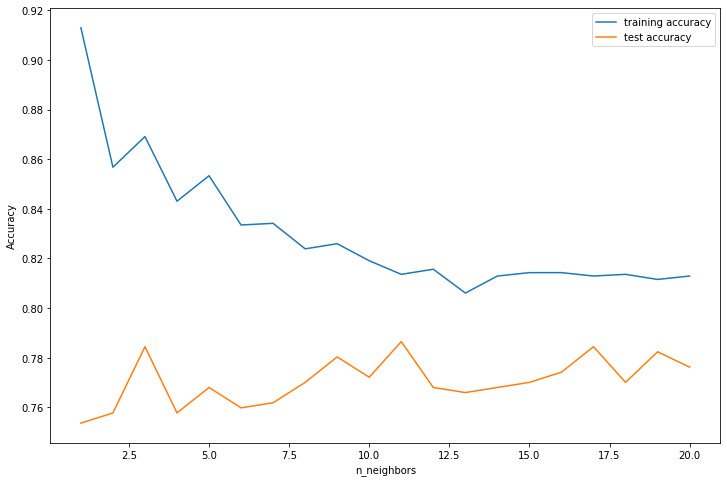

The optimal number of neighbors is: 11


In [2596]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = chef_data,
                                y_data = chef_target,
                                 response_type = 'class')

In [2597]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) #transform to new dataframe


# train-test split with the scaled data,notice, prof. is using X_train_scaled, X_test_scaled
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify = chef_target)

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsClassifier(algorithm = 'auto',
                   n_neighbors = opt_neighbors)

# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)

# SCORING the results
print('Training Score:', knn_stand.score(X_train,y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test,y_test).round(4))
print('AUC Score    :', roc_auc_score(y_true  = y_test_full,
                                      y_score = knn_stand_pred).round(4))

Training Score: 0.8225
Testing Score: 0.7782
AUC Score    : 0.7674


In [2598]:
# # looping to make x-variables suitable for statsmodels
# for col in chef.columns: 
#     print(f"'{col}',")

## DecisionTreeClassifier

In [2599]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.9452
Testing  ACCURACY: 0.7556
AUC Score        : 0.7372


In [2600]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))



Training ACCURACY: 0.8012
Testing  ACCURACY: 0.7721
AUC Score        : 0.7612


### DecisionTreeClassifier with Gridsearch cross validation
For hyperparameter will take time to run , so I runned to check the score , then I keep the code as a comment so it will be faster to work on this project. 

In [2601]:
# # declaring a hyperparameter space
# criterion_space = ['gini', 'entropy']
# splitter_space = ['best', 'random']
# depth_space = pd.np.arange(1, 25)
# leaf_space  = pd.np.arange(1, 100)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'splitter'         : splitter_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 222)


# # GridSearchCV object
# tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                                       needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(chef_data, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

## Randomforest Classifier
In this model , i change the significant varaible from the dictionary that I have create above ,to see which one that I can get the highest score. And<strong>'logit_sig_2'<strong> is the one that has create the highest score

In [2626]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS'].astype('int')


# train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)

In [2627]:
# INSTANTIATING a random forest model with default values
rf_default_full = RandomForestClassifier(n_estimators     = 5,
                                         criterion        = 'gini',
                                         max_depth        = None,
                                         min_samples_leaf = 1,
                                         bootstrap        = True,
                                         warm_start       = False,
                                         random_state     = 222)


# FITTING the training data
rf_default_full_fit = rf_default_full.fit(X_train_full, y_train_full)


# PREDICTING based on the testing set
rf_default_full_pred = rf_default_full_fit.predict(X_test_full)


# SCORING the results
print('Training ACCURACY:', rf_default_full_fit.score(X_train_full, y_train_full).round(4))
print('Testing  ACCURACY:', rf_default_full_fit.score(X_test_full, y_test_full).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_full_pred).round(4))

Training ACCURACY: 0.9143
Testing  ACCURACY: 0.7741
AUC Score        : 0.7525


In [2628]:
rf_tuned = RandomForestClassifier(criterion='gini',
                                           n_estimators=800,
                                           max_depth=6,
                                           min_samples_split= 60,
                                           min_samples_leaf=0.001,
                                           max_features=0.3,
                                           bootstrap= True,
                                           oob_score=True,
                                           random_state=222,
                                           n_jobs=-1) 
rf_tuned.fit(X_train,y_train)


rf_tuned_pred = rf_tuned.predict(X_test)

print('Training ACCURACY:', rf_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred.round(4)))



Training ACCURACY: 0.8108
Testing  ACCURACY: 0.7906
AUC Score        : 0.7628882949879928


### Randomforest Classifier with Gridsearch CV
For hyperparameter below will take time to run , so I runned to check the score , then I keep the code as a comment so it will be faster to work on this project. 

In [2605]:
# # declaring a hyperparameter space
# estimator_space  = pd.np.arange(100, 1100, 250)
# leaf_space       = pd.np.arange(1, 31, 10)
# criterion_space  = ['gini', 'entropy']
# bootstrap_space  = [True, False]
# warm_start_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_space,
#               'min_samples_leaf' : leaf_space,
#               'criterion'        : criterion_space,
#               'bootstrap'        : bootstrap_space,
#               'warm_start'       : warm_start_space}


# # INSTANTIATING the model object without hyperparameters
# full_forest_grid = RandomForestClassifier(random_state = 222)


# # GridSearchCV object
# full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                               param_grid = param_grid,
#                               cv         = 3,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_forest_cv.fit(chef_data, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_forest_cv.best_params_)
# print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

# GradientBoostingClassifier

In [2606]:

# INSTANTIATING a model object
GBR_model = GradientBoostingClassifier(max_depth= 7,
                              subsample= 0.2,
                              min_samples_leaf= 0.001,
                              max_features=0.5,
                              n_estimators= 40,
                              min_samples_split = 2,
                              random_state=222)


# FITTING the training data
GBR_model.fit(X_train,y_train)


# PREDICTING on new data
GBR_pred = GBR_model.predict(X_test)

print('Training Score:', GBR_model.score(X_train,y_train).round(3))
print('Testing Score:',  GBR_model.score(X_test,y_test).round(3))
print('AUC Score    :', roc_auc_score(y_true  = y_test_full,
                                      y_score = GBR_pred).round(4))


Training Score: 0.849
Testing Score: 0.78
AUC Score    : 0.7503


# Final Score

In [2625]:
# SCORING the results
print("""     

Logistic Reg
---------------------------------""")
print('Training ACCURACY        :', logreg_fit.score(X_train,y_train).round(4))
print('Testing  ACCURACY        :', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score                :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

print("""     

KNN
---------------------------------""")
print('Training ACCURACY         :', knn_stand.score(X_train,y_train).round(4))
print('Testing ACCURACY          :', knn_stand.score(X_test,y_test).round(4))
print('AUC ACCURACY              :', roc_auc_score(y_true  = y_test_full,
                                      y_score = knn_stand_pred).round(4))


print("""     

DecisionTree Classifier
---------------------------------""")
print('Training ACCURACY         :', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY         :', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score                 :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))


print("""     

Pruned Tree
---------------------------------""")
print('Training ACCURACY         :', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY         :', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score                 :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


print("""     

Grid Search Cross Validation
---------------------------------""")
print("Tuned Parameters          :", lr_tuned_cv.best_params_)
print("Tuned CV AUC              :", lr_tuned_cv.best_score_.round(4))


print("""     

RandomForestClassifier
---------------------------------""")
print('Training ACCURACY          :', rf_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY          :', rf_tuned.score(X_test, y_test).round(4))
print('AUC Score                  :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))



print("""     

GradientBoostingClassifier
---------------------------------""")
print('Training Score             :', GBR_model.score(X_train,y_train).round(3))
print('Testing Score              :',  GBR_model.score(X_test,y_test).round(3))
print('AUC Score                  :', roc_auc_score(y_true  = y_test_full,
                                      y_score = GBR_pred).round(4))

     

Logistic Reg
---------------------------------
Training ACCURACY        : 0.7964
Testing  ACCURACY        : 0.77
AUC Score                : 0.7444
     

KNN
---------------------------------
Training ACCURACY         : 0.8225
Testing ACCURACY          : 0.7782
AUC ACCURACY              : 0.7674
     

DecisionTree Classifier
---------------------------------
Training ACCURACY         : 0.9452
Testing  ACCURACY         : 0.7556
AUC Score                 : 0.7372
     

Pruned Tree
---------------------------------
Training ACCURACY         : 0.8012
Testing  ACCURACY         : 0.7721
AUC Score                 : 0.7612
     

Grid Search Cross Validation
---------------------------------
Tuned Parameters          : {'C': 2.3000000000000003, 'warm_start': True}
Tuned CV AUC              : 0.6227
     

RandomForestClassifier
---------------------------------
Training ACCURACY          : 0.8108
Testing  ACCURACY          : 0.7906
AUC Score                  : 0.7629
     

GradientBo

In [2613]:
print("For my analysis, RandomForestClassifier has the highest score which is ", roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))  

For my analysis, RandomForestClassifier has the highest score which is  0.7629
